In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def show_distribution(df, x):
    total = len(df)
    plt.figure(figsize=(15,19))

    plt.subplot(311)
    g = sns.countplot(x=x, data=df)
    g.set_title("Play time Distribution", fontsize=20)
    g.set_ylabel("Count",fontsize= 17)
    g.set_xlabel("Play Time", fontsize=17)
    sizes=[]
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
#         g.text(p.get_x()+p.get_width()/2.,
#                 height + 3,
#                 '{:1.2f}%'.format(height/total*100),
#                 ha="center", fontsize=14) 
    g.set_ylim(0, max(sizes) * 1.15)

    plt.show()
    
def show_distribution_with_hue(df, x, hue):
    plt.figure(figsize=(15,12))
    plt.subplot(211)
    g = sns.countplot(x=x, data=df, hue=hue, dodge=True)
    g.set_title("Hour Count Distribution by Week and Weekend Days", fontsize=20)
    g.set_ylabel("Count",fontsize= 17)
    g.set_xlabel("Hours of Day", fontsize=17)
    sizes=[]
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)

    g.set_ylim(0, max(sizes) * 1.15)
    plt.show()

def heatmap(df):
    plt.figure(figsize=(15,12))
    plt.title('Correlation of Features for Train Set', fontsize=22)
    sns.heatmap(df_train[t_stopped + 
                         #t_first_stopped + 
                         d_first_stopped].astype(float).corr(),
                vmax=1.0,  annot=True)
    plt.show()


In [3]:
train = pd.read_csv('../data/train.csv', index_col='id')
test = pd.read_csv('../data/test.csv', index_col='id')


In [5]:
train['is_play'] = train['playtime_forever']
train.loc[train['is_play'] > 0 , 'is_play'] = 1

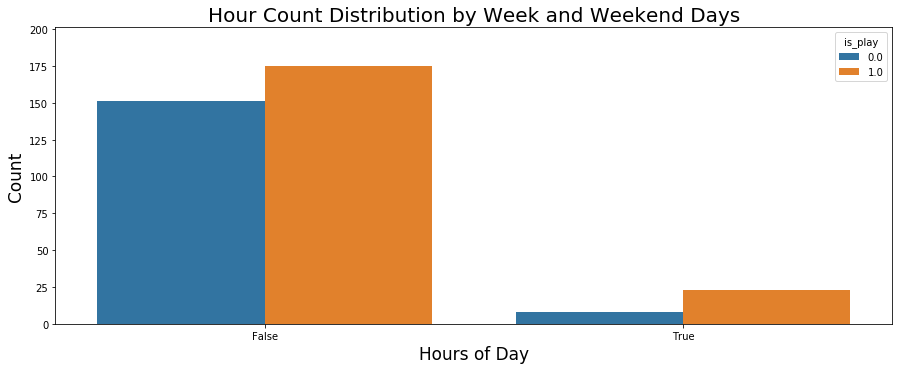

In [7]:
show_distribution_with_hue(train, 'is_free', 'is_play')

In [16]:
resumetable(train)

Dataset Shape: (357, 10)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,playtime_forever,float64,0,137,0,0.0166667,0,4.79
1,is_free,bool,0,2,False,True,False,0.43
2,price,float64,0,86,3700,0,5000,5.37
3,genres,object,0,96,"Adventure,Casual,Indie",RPG,"Adventure,Casual,Indie",5.49
4,categories,object,0,206,"Single-player,Steam Trading Cards,Steam Cloud","Single-player,Partial Controller Support","Single-player,Full controller support,Steam Tr...",6.78
5,tags,object,0,355,"Indie,Adventure,Story Rich,Casual,Atmospheric,...","Mod,Utilities,RPG,Game Development,Singleplaye...","Point & Click,Adventure,Story Rich,Comedy,Indi...",8.47
6,purchase_date,object,2,182,"Jul 2, 2018","Nov 26, 2016","Jul 2, 2018",7.10
7,release_date,object,0,316,"10 Dec, 2013","12 Aug, 2015","28 Jan, 2014",8.24
8,total_positive_reviews,float64,2,346,372,23,3018,8.41
9,total_negative_reviews,float64,2,304,96,0,663,8.13


In [17]:
resumetable(test)

Dataset Shape: (90, 9)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,is_free,bool,0,2,False,False,False,0.35
1,price,int64,0,37,3500,11600,2100,4.56
2,genres,object,0,47,"Action,Adventure","Action,Adventure,Strategy","Indie,Simulation,Strategy",5.11
3,categories,object,0,64,"Single-player,Full controller support","Single-player,Multi-player,Online Multi-Player...","Single-player,Steam Achievements,Steam Trading...",5.57
4,tags,object,0,90,"Action,Adventure,Horror,Third Person,Singlepla...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Strategy,Simulation,Indie,Political,Cold War,P...",6.49
5,purchase_date,object,2,73,"Oct 28, 2018","Jul 20, 2019","Jul 16, 2019",6.10
6,release_date,object,0,87,22-May-12,24-Apr-18,20-Mar-17,6.42
7,total_positive_reviews,float64,2,86,2607,5762,687,6.41
8,total_negative_reviews,float64,2,83,1122,2235,133,6.32


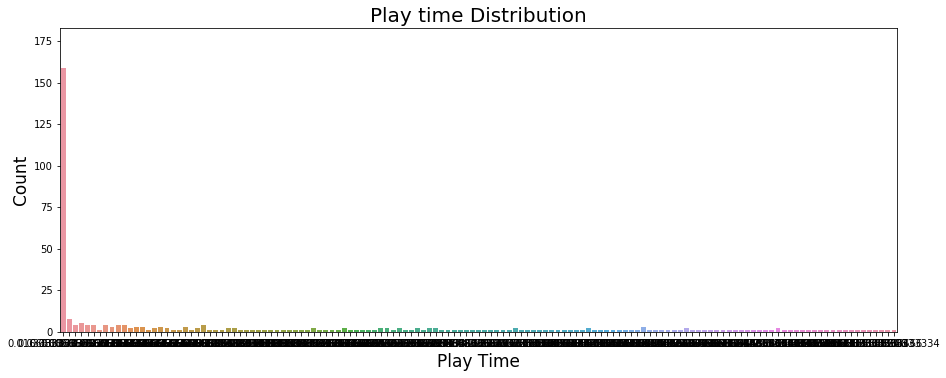

In [12]:
show_distribution(train, 'playtime_forever')

In [24]:
data = train
# is_free: boolean => map 0/1
data['is_free'] = data['is_free'].map({False:0, True:1})

# Top 2 is way larger and may have negative effect to the whole dataset. So will be removed.
data = data.drop(data['price'].nlargest(2).index)

# genres: string => split and dummy (pivot)
genres_split = data['genres'].apply(lambda x: x.strip().split(","))
genres = pd.get_dummies(genres_split.apply(pd.Series).stack()).sum(level=0)
genres.columns = pd.MultiIndex.from_product([['genres'], genres.columns])
data = data.drop(columns=['genres'])
data = pd.concat([data, genres], axis=1)

# categories: stirng => split and dummy (pivot)
categories_split = data['categories'].apply(lambda x: x.strip().split(","))
categories = pd.get_dummies(categories_split.apply(pd.Series).stack()).sum(level=0)
categories.columns = pd.MultiIndex.from_product([['categories'], categories.columns])
data = data.drop(columns=['categories'])
data = pd.concat([data, categories], axis=1)

data['tags'] = data['tags'].apply(len)

# purchase_date, release_date: date => convert to stamptime and count the differece bewteen them as well as now
# Drop the examples with NaN value
data = data.drop(data.loc[data['purchase_date'].isna(), :].index)
data['purchase_date'] = data['purchase_date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
data.loc[data['release_date'] == 'Nov 10, 2016', 'release_date'] = '10 Nov, 2016' # Exception 
data['release_date'] = data['release_date'].apply(lambda x: datetime.strptime(x, '%d %b, %Y'))
data['day_btn_purchase_release'] = (data['purchase_date'] - data['release_date']).dt.days
# Remove purchase_date and release_date
data = data.drop(columns=['purchase_date', 'release_date'])


In [31]:
summary = resumetable(data)

Dataset Shape: (353, 56)


In [36]:
drop_col = []
for i in data:
    if summary.loc[summary['Name']==i , 'Entropy'].values < 0.5:
        drop_col.append(i)

In [38]:
data = data.drop(columns=drop_col)

In [40]:
data.to_csv('../data/train_1106.csv')

In [41]:
test_data = test
# is_free: boolean => map 0/1
test_data['is_free'] = test_data['is_free'].map({False:0, True:1})

# genres: string => split and dummy (pivot)
genres_split = test_data['genres'].apply(lambda x: x.strip().split(","))
genres = pd.get_dummies(genres_split.apply(pd.Series).stack()).sum(level=0)
genres.columns = pd.MultiIndex.from_product([['genres'], genres.columns])
test_data = test_data.drop(columns=['genres'])
test_data = pd.concat([test_data, genres], axis=1)

# categories: stirng => split and dummy (pivot)
categories_split = test_data['categories'].apply(lambda x: x.strip().split(","))
categories = pd.get_dummies(categories_split.apply(pd.Series).stack()).sum(level=0)
categories.columns = pd.MultiIndex.from_product([['categories'], categories.columns])
test_data = test_data.drop(columns=['categories'])
test_data = pd.concat([test_data, categories], axis=1)

# tags: string => count its numbers of letter and catogorize
test_data['tags'] = test_data['tags'].apply(len)

# purchase_date, release_date: date => convert to stamptime and count the differece bewteen them as well as now
test_data['purchase_date'] = test_data['purchase_date'].fillna("Sep 2, 2019")
test_data['purchase_date'] = test_data['purchase_date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
test_data['release_date'] = test_data['release_date'].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))
test_data['day_btn_purchase_release'] = (test_data['purchase_date'] - test_data['release_date']).dt.days
test_data['day_btn_2020_purchase'] = (datetime(2020,1,1)-test_data['purchase_date']).dt.days
test_data = test_data.drop(columns=['purchase_date', 'release_date'])

test_data['total_positive_reviews'] = test_data['total_positive_reviews'].fillna(1)
test_data['total_negative_reviews'] = test_data['total_negative_reviews'].fillna(1)

test_data[('genres', 'Racing')] = 0
test_data[('genres', 'Design & Illustration')] = 0
test_data[('genres', 'Utilities')] = 0
test_data[('genres', 'Sexual Content')] = 0
test_data[('categories', 'Valve Anti-Cheat enabled')] = 0
test_data[('genres', 'Animation & Modeling')] = 0
test_data[('genres', 'Audio Production')] = 0
test_data['playtime_forever'] = 0

In [44]:
test_data = test_data[data.columns]

In [47]:
test_data = test_data.drop(columns=['playtime_forever'])


In [48]:
test_data.to_csv('../data/test_1106.csv')

In [64]:
corr = data.astype(float).corr()
irrelevent = []
for i in corr:
    if abs(corr['playtime_forever'][i]) < 0.1:
        irrelevent.append(i)

In [66]:
data = data.drop(columns=irrelevent)
test_data = test_data.drop(columns=irrelevent)

In [69]:
test_data['playtime_forever'] = 0
test_data.columns = data.columns
test_data = test_data.drop(columns=['playtime_forever'])

In [70]:
data.to_csv('../data/train_1106.csv')
test_data.to_csv('../data/test_1106.csv')

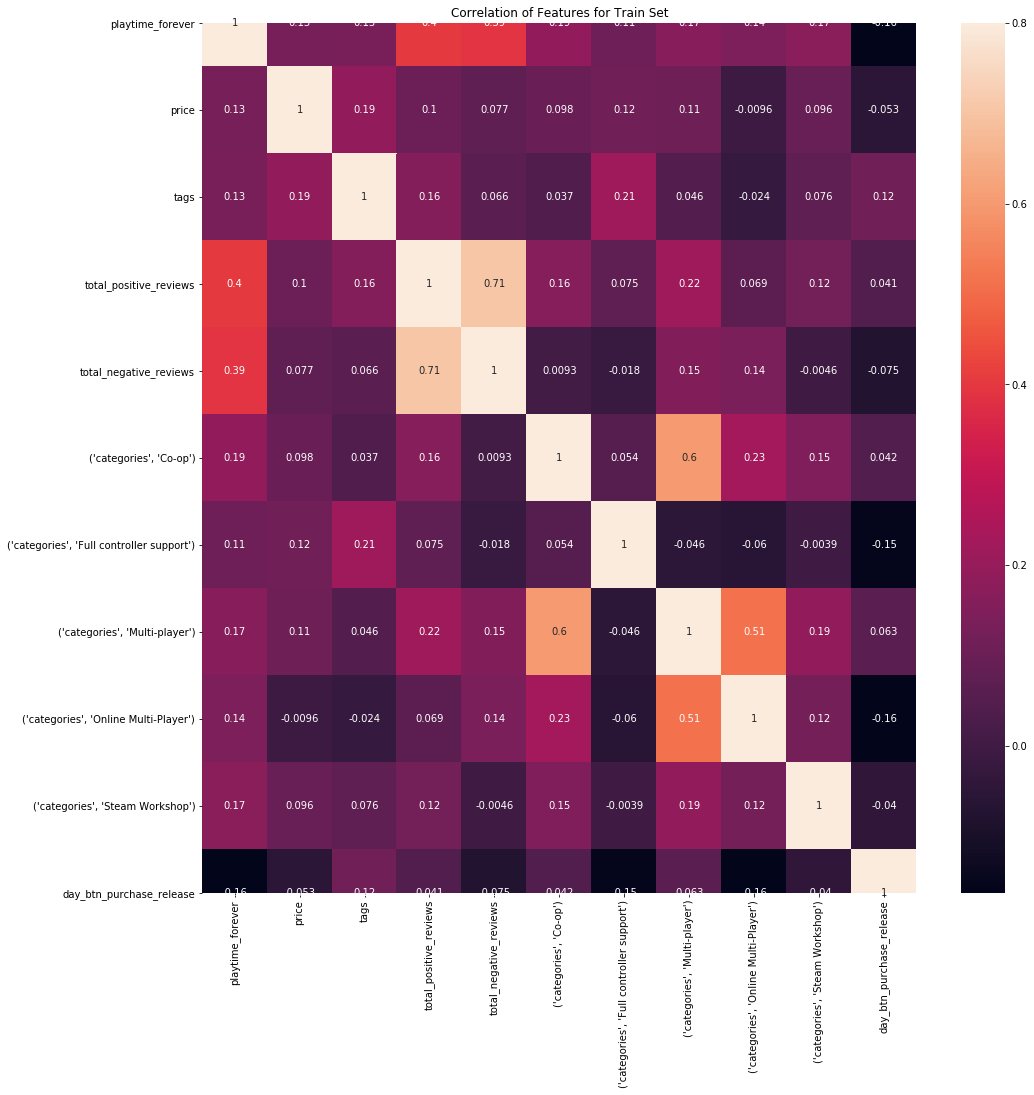

In [77]:

plt.title('Correlation of Features for Train Set')
sns.heatmap(data.astype(float).corr(),
            vmax=0.8,  annot=True)
plt.show()